In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns

iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [78]:
iris_data = iris.data
iris_target = iris.target

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
le.fit(df['target'])
df['target'] = le.transform(df['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [80]:
X=df.drop('target',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
y=df['target']
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [82]:
X = X.to_numpy()

In [83]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [84]:
X.shape

(150, 4, 1)

In [85]:
y.shape

(150,)

In [86]:
y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [87]:
n_steps = X.shape[1]
n_steps

4

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import models
from keras.optimizers import SGD,Adam

In [89]:
def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()   

input_shape =>  4 1
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 64)             192       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                3250      
                                                                 
 dense_15 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
________________________________

In [90]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6969 - accuracy: 0.3167 - val_loss: 0.6613 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.4750 - val_loss: 0.6652 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.3667 - val_loss: 0.6570 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.3667 - val_loss: 0.6265 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.3667 - val_loss: 0.6011 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6917 - val_loss: 0.5833 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.6917 - val_loss: 0.5574 - val_accuracy: 0.5667
Epoch 8/100
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9667 - val_loss: 0.0989 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9417 - val_loss: 0.0993 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9333 - val_loss: 0.0901 - val_accuracy: 0.9667
Epoch 62/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.9417 - val_loss: 0.1679 - val_accuracy: 0.8667
Epoch 63/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9667 - val_loss: 0.0790 - val_accuracy: 0.9667
Epoch 64/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9500 - val_loss: 0.1341 - val_accuracy: 0.9000
Epoch 65/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9417 - val_loss: 0.0884 - val_accuracy: 0.9667
Epoch 66/100
4/4 [===============

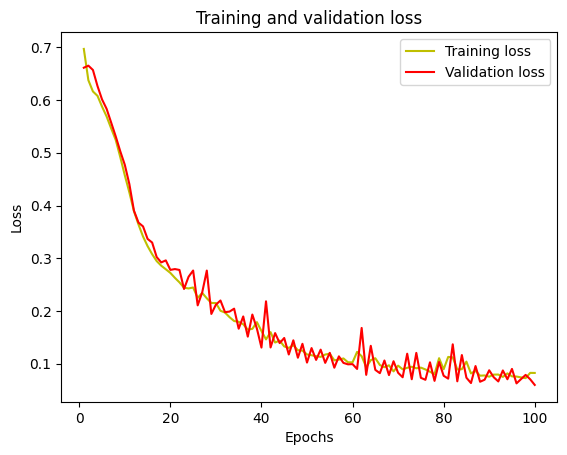

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

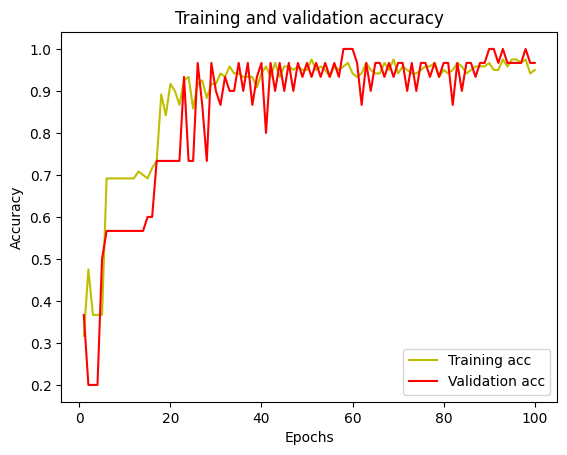

In [92]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
